## Bank Loan Classification

- Description:
  
    You are given a dataset of the bank loans consisting of 15 columns and a corresponding
    target column. Your task is to build a machine-learning model that can accurately classify
    whether the personal loan was accepted or not based on the information provided.

Dataset:
The dataset is provided in a Xlsx file with the following columns and their details:

● ID: ID of the customer

● Age: Age of the customer

● Gender: M for Male, F for Female and O for Others

● Experience: Amount of work experience in years

● Income: Amount of annual income (in thousands)

● Home Ownership: Home Owner, Rent and Home Mortgage.

● Zipcode: Postal code in which the client lives

● Family: Number of family members

● CCAvg: Average monthly spending with the credit card (in thousands)

● Education: Education level (1: bachelor's degree, 2: master's degree, 3:
advanced/professional degree)

● Mortgage: Value of home mortgage, if any (in thousands)

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit account (CD) with the
bank?

● Online: Does the customer use the internet banking facilities?

● CreditCard: Does the customer use a credit card issued by the bank?

● Personal Loan: Did this customer accept the personal loan offered in the last campaign?
(Target Variable)

### Importing Libraries and loading the dataset

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
bank_data = pd.read_excel('Bank_loan_data (1).xlsx', sheet_name='Data')


#### Exploring the dataset

In [3]:
bank_data.head()

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,NaN,1,49.0,91107,4,1.6,1,0,NaN,0,1,0,0.0,0
1,2,45,NaN,19,34.0,90089,3,1.5,1,0,NaN,0,1,0,0.0,0
2,3,39,NaN,15,11.0,94720,1,1.0,1,0,NaN,0,0,0,0.0,0
3,4,35,NaN,9,100.0,94112,1,2.7,2,0,NaN,0,0,0,0.0,0
4,5,35,NaN,8,45.0,91330,4,1.0,2,0,NaN,0,0,0,0.0,1


#### Shape of the dataset

In [4]:
bank_data.shape

(5000, 16)

- There are 5000 rows and 16 columns, where 15 are features columns and 1 is output or target column

#### Info about the dataframe

In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Gender              480 non-null    object 
 3   Experience          5000 non-null   int64  
 4   Income              4933 non-null   float64
 5   ZIP Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Home Ownership      480 non-null    object 
 11  Personal Loan       5000 non-null   object 
 12  Securities Account  5000 non-null   int64  
 13  CD Account          5000 non-null   int64  
 14  Online              4960 non-null   float64
 15  CreditCard          5000 non-null   int64  
dtypes: flo

#### Statistical Description of data in a dataframe

In [6]:
bank_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,4933.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4960.000000,5000.000000
mean,2500.500000,46.008200,20.104600,72.758159,93152.503000,2.396400,1.937913,1.881000,56.498800,0.104400,0.06040,0.596976,0.294000
std,1443.520003,25.444898,11.467954,45.425519,2121.852197,1.147663,1.747666,0.839869,101.713802,0.305809,0.23825,0.490555,0.455637
min,1.000000,0.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,63.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,95.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,978.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


#### Datatypes in dataframe

In [7]:
bank_data.dtypes

ID                      int64
Age                     int64
Gender                 object
Experience              int64
Income                float64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Home Ownership         object
Personal Loan          object
Securities Account      int64
CD Account              int64
Online                float64
CreditCard              int64
dtype: object

#### Data Preprocessing 

- Checking if there's any missing values

In [8]:
bank_data.isna().sum()

ID                       0
Age                      0
Gender                4520
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        4520
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

- In terms of percentage

In [9]:
bank_data.isna().sum()*100 /len(bank_data)

ID                     0.00
Age                    0.00
Gender                90.40
Experience             0.00
Income                 1.34
ZIP Code               0.00
Family                 0.00
CCAvg                  0.00
Education              0.00
Mortgage               0.00
Home Ownership        90.40
Personal Loan          0.00
Securities Account     0.00
CD Account             0.00
Online                 0.80
CreditCard             0.00
dtype: float64

- Gender Column
    - Here although 90.4% data is missing in 'Gender' column, but this column does not play significant role is loan approval or not so its better to drop

In [10]:
# Drop 'Gender' column
bank_data.drop(columns=['Gender'],inplace=True)

- Home Ownership
    - It also has 90.40% missing values but it contains information that might be necessary for the model and dropping it would result in a significant loss of valuable info. So, we impute missing values by most frequent value (mode) for this categorical variable

In [11]:
# Impute missing values for 'Home Ownership' with the mode (most frequent value)
bank_data['Home Ownership'].fillna(bank_data['Home Ownership'].mode().values[0], inplace=True)

- Income
  - Only 1.34% missing values, we impute with the mean

In [12]:
# Impute missing values for 'Income' with the mean
bank_data['Income'].fillna(bank_data['Income'].mean(), inplace=True)

- Online
  - It has 0.80% missing data. Since,, its a binary categorical variable imputing it with the most frequent

In [13]:
bank_data['Online'].fillna(bank_data['Online'].mode().values[0], inplace=True)

#### Dropping more irrelevant column

- The customer id does not have relation with loan so dropping it too

In [14]:
# Dropping the ID column
bank_data.drop(['ID'],axis=1,inplace=True)

- Since, income is usually given a priority for loan approval rather than work experience so, we remove experience column too

In [15]:
bank_data.drop(['Experience'],axis=1,inplace=True)

- zip code also does not directly contribute for loan approval so we remove it

In [16]:
bank_data.drop(['ZIP Code'],axis=1,inplace=True)

- Checking Target column

In [17]:
bank_data['Personal Loan'].value_counts()

0    4520
1     479
        1
Name: Personal Loan, dtype: int64

- Number of loan not accepted is 4520 and accepted is 479 and other 1 data is not labeled

In [18]:
bank_data['Personal Loan'].unique()

array([0, 1, ' '], dtype=object)

In [19]:
(bank_data['Personal Loan'].str.strip() == '').sum()

1

In [20]:
# Remove rows with ' ' (empty string) values in the 'Personal Loan' column
bank_data = bank_data[bank_data['Personal Loan'] != ' ']

In [21]:
# Reset the index after removing rows
bank_data.reset_index(drop=True, inplace=True)

- Also, the target column 'Personal Loan' datatype is object so we convert it into integer

In [22]:
# Convert the 'Personal Loan' column to integers
bank_data['Personal Loan'] = bank_data['Personal Loan'].astype(int)

In [23]:
# Now again checking the missing values
bank_data.isna().sum()

Age                   0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Home Ownership        0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### Exploratory Data Analysis (EDA)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

- Univariate Analysis

<AxesSubplot: xlabel='Family', ylabel='count'>

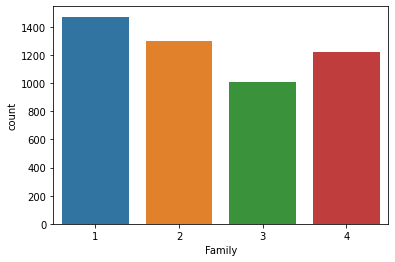

In [25]:
# Count Plot to show Family Distributions
sns.countplot(x='Family',data=bank_data)


In [26]:
# Value counts of Family column
bank_data['Family'].value_counts()

1    1472
2    1296
4    1221
3    1010
Name: Family, dtype: int64

<AxesSubplot: xlabel='Age', ylabel='count'>

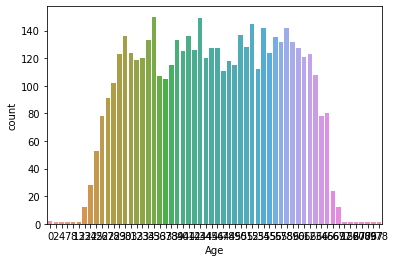

In [27]:
# Count Plot to show Family Distributions
sns.countplot(x='Age',data=bank_data)

In [28]:
# Value counts of Family column
bank_data['Age'].value_counts()

35     150
43     149
52     145
58     142
54     142
50     137
41     136
30     136
56     135
34     133
39     133
59     132
57     132
51     128
46     127
45     127
60     127
42     126
40     125
55     124
31     124
29     123
62     123
61     121
33     120
44     120
32     119
48     118
38     115
49     115
53     112
47     111
63     108
36     107
37     105
28     102
27      91
65      80
64      78
26      78
25      53
24      28
66      24
23      12
67      12
0        2
4        1
8        1
7        1
600      1
786      1
13       1
2        1
978      1
97       1
567      1
122      1
797      1
Name: Age, dtype: int64

<AxesSubplot: xlabel='Education', ylabel='count'>

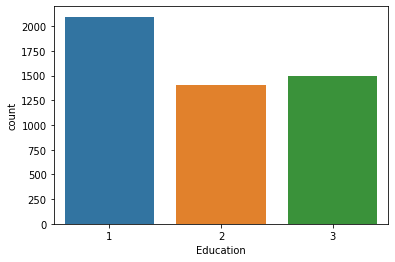

In [29]:
# Count Plot to show Education Distributions
sns.countplot(x='Education',data=bank_data)

In [30]:
# Value counts of Education column
bank_data['Education'].value_counts()

1    2096
3    1501
2    1402
Name: Education, dtype: int64

<AxesSubplot: xlabel='CreditCard', ylabel='count'>

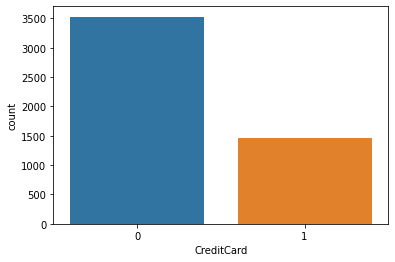

In [31]:
# Count Plot to show CreditCard Distributions
sns.countplot(x='CreditCard',data=bank_data)

In [32]:
# Value counts of Family column
bank_data['CreditCard'].value_counts()

0    3529
1    1470
Name: CreditCard, dtype: int64

<AxesSubplot: xlabel='Online', ylabel='count'>

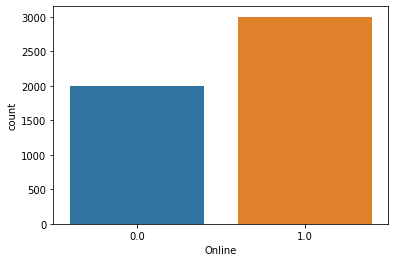

In [33]:
#  Count Plot to show Online Distributions
sns.countplot(x='Online',data=bank_data)

In [34]:
# Value counts of Family column
bank_data['Online'].value_counts()

1.0    3000
0.0    1999
Name: Online, dtype: int64

In [35]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4999 non-null   int64  
 1   Income              4999 non-null   float64
 2   Family              4999 non-null   int64  
 3   CCAvg               4999 non-null   float64
 4   Education           4999 non-null   int64  
 5   Mortgage            4999 non-null   int64  
 6   Home Ownership      4999 non-null   object 
 7   Personal Loan       4999 non-null   int32  
 8   Securities Account  4999 non-null   int64  
 9   CD Account          4999 non-null   int64  
 10  Online              4999 non-null   float64
 11  CreditCard          4999 non-null   int64  
dtypes: float64(3), int32(1), int64(7), object(1)
memory usage: 449.3+ KB


<ipython-input-36-75ee2c154c05>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data["Age"])


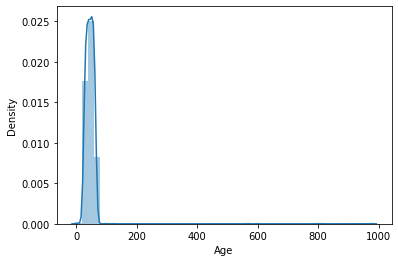

In [36]:
sns.distplot(bank_data["Age"])
plt.show()

- Age have normal distributions

<ipython-input-37-afc27487bb3b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data["Income"])


<AxesSubplot: xlabel='Income', ylabel='Density'>

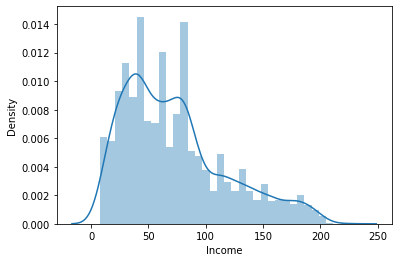

In [37]:
sns.distplot(bank_data["Income"])

- Income is right skewed distributions

<ipython-input-38-6dbf5c3cda45>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data["Mortgage"])


<AxesSubplot: xlabel='Mortgage', ylabel='Density'>

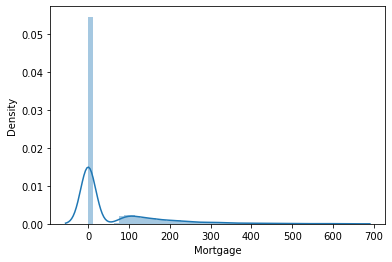

In [38]:
sns.distplot(bank_data["Mortgage"])

- Mortgage seems to be highly skewed 

<ipython-input-39-d06fc606c351>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data["CCAvg"])


<AxesSubplot: xlabel='CCAvg', ylabel='Density'>

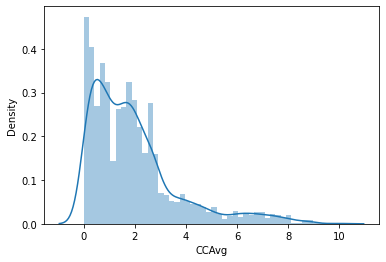

In [39]:

sns.distplot(bank_data["CCAvg"])

- Credit Card Average is right skewed distributions

If we use skewed then it will create fault in logistic regression.

#### Log Transform for skewed Variables

In [60]:
bank_data['Income'] = np.log1p(bank_data['Income'])
bank_data['CCAvg'] = np.log1p(bank_data['CCAvg'])
bank_data['Mortgage'] = np.log1p(bank_data['Mortgage'])


<ipython-input-61-afc27487bb3b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data["Income"])


<AxesSubplot: xlabel='Income', ylabel='Density'>

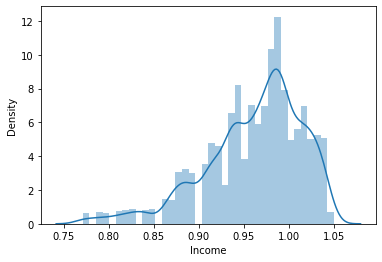

In [61]:
sns.distplot(bank_data["Income"])

<ipython-input-63-d06fc606c351>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data["CCAvg"])


<AxesSubplot: xlabel='CCAvg', ylabel='Density'>

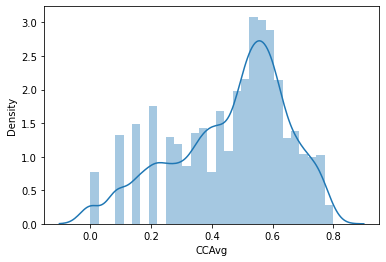

In [63]:
sns.distplot(bank_data["CCAvg"])

<ipython-input-64-6dbf5c3cda45>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data["Mortgage"])


<AxesSubplot: xlabel='Mortgage', ylabel='Density'>

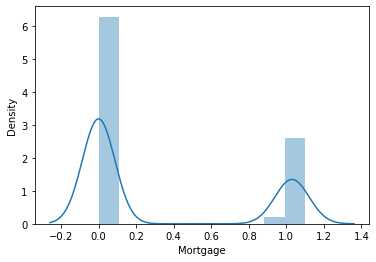

In [64]:
sns.distplot(bank_data["Mortgage"])

#### Multivariate Analysis

<AxesSubplot: xlabel='Education', ylabel='Income'>

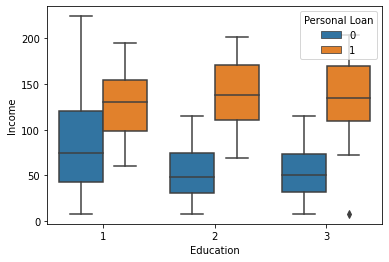

In [40]:
# Influence of income and education on personal loan
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=bank_data)

Observation : It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

<AxesSubplot: xlabel='Securities Account', ylabel='count'>

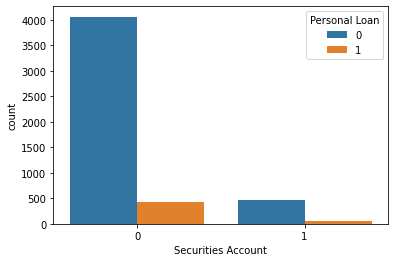

In [41]:
sns.countplot(x="Securities Account", data=bank_data,hue="Personal Loan")

- Observation : Majority of customers who does not have loan have securities account

<AxesSubplot: xlabel='Family', ylabel='count'>

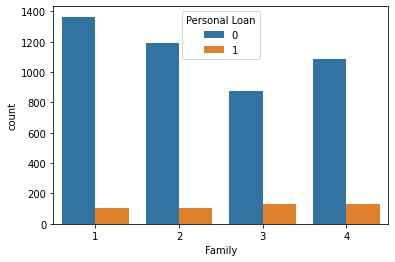

In [42]:
sns.countplot(x='Family',data=bank_data,hue='Personal Loan')

- Observation: Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

<AxesSubplot: xlabel='CD Account', ylabel='count'>

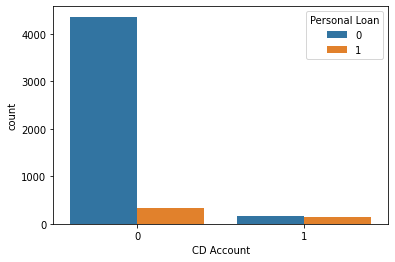

In [43]:
sns.countplot(x='CD Account',data=bank_data,hue='Personal Loan')

- Observation: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

#### Relation between features using correlation

In [44]:
bank_data.corr()

<ipython-input-44-e23b2d98f117>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank_data.corr()


,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.027052,-0.017717,0.011716,0.023997,0.022085,0.077719,-0.008272,0.022627,0.005055,-0.000158
Income,0.027052,1.000000,-0.166313,0.632117,-0.202951,0.196730,0.443216,-0.004430,0.144369,0.020226,-0.008320
Family,-0.017717,-0.166313,1.000000,-0.109175,0.064902,-0.021452,0.060578,0.020094,0.014184,0.013439,0.011771
CCAvg,0.011716,0.632117,-0.109175,1.000000,-0.136128,0.110382,0.367540,0.015055,0.136516,0.004753,-0.006749
Education,0.023997,-0.202951,0.064902,-0.136128,1.000000,-0.033467,0.136764,-0.010802,0.013941,-0.012120,-0.010996
Mortgage,0.022085,0.196730,-0.021452,0.110382,-0.033467,1.000000,0.140253,-0.005179,0.089598,-0.004148,-0.006788
Personal Loan,0.077719,0.443216,0.060578,0.367540,0.136764,0.140253,1.000000,0.022185,0.316811,0.027112,0.003201
Securities Account,-0.008272,-0.004430,0.020094,0.015055,-0.010802,-0.005179,0.022185,1.000000,0.317023,0.010332,-0.015073
CD Account,0.022627,0.144369,0.014184,0.136516,0.013941,0.089598,0.316811,0.317023,1.000000,0.174420,0.278625
Online,0.005055,0.020226,0.013439,0.004753,-0.012120,-0.004148,0.027112,0.010332,0.174420,1.000000,0.004323


<ipython-input-45-528d885c1fae>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bank_data.corr(), annot=True, ax=ax)


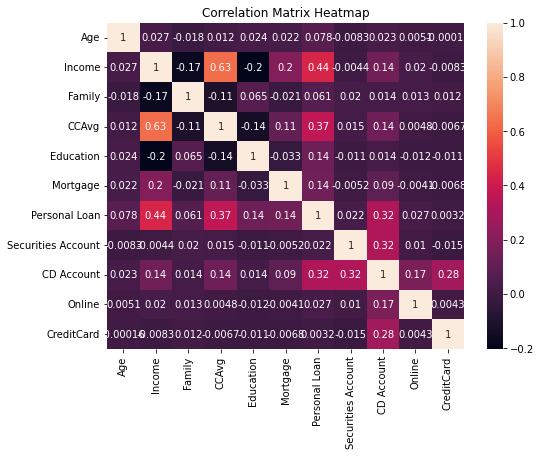

In [45]:
# Create a figure and axis using plt.subplots() with figsize
fig, ax = plt.subplots(figsize=(8, 6))

# Create the heatmap for the correlation matrix
sns.heatmap(bank_data.corr(), annot=True, ax=ax)

# Show the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()

- CCAvg Credit average and income are highly correlated

#### Feature Engineering

In [46]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4999 non-null   int64  
 1   Income              4999 non-null   float64
 2   Family              4999 non-null   int64  
 3   CCAvg               4999 non-null   float64
 4   Education           4999 non-null   int64  
 5   Mortgage            4999 non-null   int64  
 6   Home Ownership      4999 non-null   object 
 7   Personal Loan       4999 non-null   int32  
 8   Securities Account  4999 non-null   int64  
 9   CD Account          4999 non-null   int64  
 10  Online              4999 non-null   float64
 11  CreditCard          4999 non-null   int64  
dtypes: float64(3), int32(1), int64(7), object(1)
memory usage: 449.3+ KB


#### Label Encoding for Home Ownership
- Converts the labels into numeric form so as to convert it into the machine-readable form
- Label encoding assigns a unique integer to each category in the column. In this case, 'Home Mortage' might be encoded as 0, 'Home Owner' as 1, and 'Rent' as 2.

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:

# Use Label Encoder to convert 'Home Ownership' column to numerical form
bank_data['Home Ownership'] = le.fit_transform(bank_data['Home Ownership'])

In [49]:
bank_data['Home Ownership'].value_counts()

0    4738
1     138
2     123
Name: Home Ownership, dtype: int64

In [50]:
bank_data.sample(5)

,Age,Income,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
3287,56,140.0,4,0.5,1,292,0,1,0,0,0.0,0
4580,37,59.0,1,1.5,3,0,0,0,0,0,0.0,1
3302,55,28.0,2,0.7,2,82,0,0,0,0,1.0,1
3752,30,34.0,2,0.3,2,0,0,0,0,0,1.0,1
3084,55,71.0,3,0.3,2,0,0,0,0,0,0.0,1


In [51]:
bank_data.dtypes

Age                     int64
Income                float64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Home Ownership          int32
Personal Loan           int32
Securities Account      int64
CD Account              int64
Online                float64
CreditCard              int64
dtype: object

In [52]:
bank_data.describe()

,Age,Income,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,46.011002,72.746309,2.396079,1.938081,1.880976,56.427686,0.076815,0.095819,0.104421,0.060412,0.600120,0.294059
std,25.446672,45.116811,1.147554,1.747801,0.839951,101.599587,0.346625,0.294373,0.305836,0.238273,0.489922,0.455664
min,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,94.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,978.000000,224.000000,4.000000,10.000000,3.000000,635.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Model Training

In [66]:
from sklearn.model_selection import train_test_split
# Separate features (attributes) and target (class) from the DataFrame
X = bank_data.drop(columns=['Personal Loan'])
y = bank_data['Personal Loan']
# Separate the data into train - 80% and test - 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [79]:
X.shape

(4999, 11)

In [81]:
y.shape

(4999,)

In [67]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Using Logistic Regression

In [69]:
# Create and train the Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [70]:
# Make predictions on the test sets
y_predicted = model.predict(X_test_scaled)

In [71]:
print(y_predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

#### Evaluate the model

In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [73]:
# Accuracy
accuracy = accuracy_score(y_test,y_predicted)
print("Accuracy",accuracy)

Accuracy 0.972


Accuracy:
- The model has an overall accuracy of 97%, meaning that it correctly predicted the class for 97% of the instances in the dataset.

In [74]:
# Classification Report
classification_rep = classification_report(y_test,y_predicted)
print("Classification Report:\n", classification_rep) 

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       905
           1       0.95      0.75      0.84        95

    accuracy                           0.97      1000
   macro avg       0.96      0.87      0.91      1000
weighted avg       0.97      0.97      0.97      1000



##### Precision
  
- For class 0: Out of all instances predicted as "Personal Loan Not Approved," 97% were actually not approved, and 3% were incorrectly predicted.

- For class 1: Out of all instances predicted as "Personal Loan Approved," 95% were actually approved, and 5% were incorrectly predicted.

##### Recall

- For class 0: Out of all instances that were actually "Personal Loan Not Approved," the model correctly identified all of them (100% recall).

- For class 1: Out of all instances that were actually "Personal Loan Approved," the model correctly identified 75%, and 25% were incorrectly predicted as not approved.

##### F1 score

- For class 0: The F1-Score considers both precision and recall, resulting in a score of 0.98, which is high.
  
- For class 1: The F1-Score balances precision and recall, resulting in a score of 0.84, indicating a good balance between true positives and false positives/negatives.

In [75]:
conf_matrix = confusion_matrix(y_test,y_predicted)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[901   4]
 [ 24  71]]


- True Negatives (TN): 901 instances were correctly predicted as class 0 (not accepted).

- False Positives (FP): 4 instances were wrongly predicted as class 1 (loan approved) when they were actually class 0.

- False Negatives (FN): 24 instances were wrongly predicted as class 0 when they were actually class 1.

- True Positives (TP): 71 instances were correctly predicted as class 1 (loan approved)

In [76]:
bank_data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,0.952309,4,0.513214,1,0.0,0,0,1,0,0.0,0
1,45,0.922790,3,0.501012,1,0.0,0,0,1,0,0.0,0
2,39,0.810237,1,0.423036,1,0.0,0,0,0,0,0.0,0
3,35,1.002638,1,0.607875,2,0.0,0,0,0,0,0.0,0
4,35,0.945681,4,0.423036,2,0.0,0,0,0,0,0.0,1


#### Sample new data to make predictions

In [77]:
# Now, let's create some example data for prediction
new_data = pd.DataFrame({
    'Age': [30],
    'Income': [80],
    'Family': [3],
    'CCAvg' : [1.6],
    'Education': [2],
    'Mortgage': [100],
    'Home Ownership': [1],
    'Securities Account': [0],
    'CD Account': [1],
    'Online': [1.0],
    'CreditCard': [0],
   
})

# Feature Scaling for the new data
new_data_scaled = scaler.transform(new_data)

# Make predictions
prediction = model.predict(new_data_scaled)

# Print the prediction
if prediction[0] == 1:
    print("Personal Loan is predicted to be accepted.")
else:
    print("Personal Loan is predicted to be not accepted.")

Personal Loan is predicted to be accepted.


##### Saving a Trained Model:

In [82]:
import joblib


In [83]:
joblib.dump(model, 'trained_model.pkl')

['trained_model.pkl']